# Prepare Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv('train.csv')
df

C:\Users\JYManuel\Miniconda3\envs\joseff\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0
...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,a,1
914625,1112,2,2013-01-01,0,0,0,0,a,1
914626,1113,2,2013-01-01,0,0,0,0,a,1
914627,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
# Convert strings to integers
df['StateHoliday'] = df['StateHoliday'].replace(['0'],1)
df['StateHoliday'] = df['StateHoliday'].replace(['a'],2)
df['StateHoliday'] = df['StateHoliday'].replace(['b'],3)
df['StateHoliday'] = df['StateHoliday'].replace(['c'],4)

In [4]:
# Check data type
print((type(df['Store'][0])))
print((type(df['DayOfWeek'][0])))
print((type(df['Date'][0])))
print((type(df['Sales'][0])))
print((type(df['Customers'][0])))
print((type(df['Open'][0])))
print((type(df['Promo'][0])))
print((type(df['StateHoliday'][0])))
print((type(df['SchoolHoliday'][0])))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [5]:
# Check data
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,1,0
1,2,4,2015-04-30,6884,716,1,1,1,0
2,3,4,2015-04-30,9971,979,1,1,1,0
3,4,4,2015-04-30,16106,1854,1,1,1,0
4,5,4,2015-04-30,6598,729,1,1,1,0
...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,2,1
914625,1112,2,2013-01-01,0,0,0,0,2,1
914626,1113,2,2013-01-01,0,0,0,0,2,1
914627,1114,2,2013-01-01,0,0,0,0,2,1


In [6]:
# Select random rows for sampling
df = df.sample(n = 10000)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
455132,998,1,2014-02-17,5862,670,1,1,0,0
457934,455,5,2014-02-14,6018,423,1,0,0,0
841619,580,4,2013-03-07,13311,1953,1,1,1,0
306917,1078,1,2014-06-30,11347,732,1,1,1,0
426982,723,5,2014-03-14,5204,464,1,0,0,0
...,...,...,...,...,...,...,...,...,...
898178,274,2,2013-01-15,2164,629,1,0,1,0
639183,1074,4,2013-09-05,3860,479,1,0,1,0
219712,988,3,2014-10-01,4949,700,1,1,1,0
198715,475,4,2014-10-23,5660,940,1,1,1,0


# Build Model

In [7]:
# Initialize autoML setup
from pycaret.regression import *
exp_reg101 = setup(data = df, target = 'Sales', session_id=143, categorical_features = ['Date', 'StateHoliday'], numeric_features=['Store', 'DayOfWeek', 'Customers', 'Open', 'SchoolHoliday'], ignore_features = ['Promo'])

,Description,Value
0,session_id,143
1,Target,Sales
2,Original Data,"(10000, 9)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6999, 860)"


In [8]:
# Compare models
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,928.9848,1869648.4551,1365.5079,0.8703,1.4694,0.1672,6.7230
lightgbm,Light Gradient Boosting Machine,941.0002,1943431.7960,1393.1765,0.8653,1.4876,0.1682,0.2420
br,Bayesian Ridge,959.6159,2068703.5900,1435.3269,0.8562,1.6951,0.1824,1.1610
ridge,Ridge Regression,967.3372,2087714.6461,1441.9581,0.8549,1.6750,0.1837,0.0990
gbr,Gradient Boosting Regressor,982.0755,2086025.0123,1442.6874,0.8553,1.8092,0.1751,3.1360
rf,Random Forest Regressor,956.8972,2087272.9864,1443.4155,0.8554,0.1944,0.1696,8.7970
lar,Least Angle Regression,971.0916,2117763.1369,1452.2587,0.8528,1.6315,0.1850,0.2190
lasso,Lasso Regression,1005.7201,2246228.3042,1495.9617,0.8439,1.7066,0.1915,0.4320
et,Extra Trees Regressor,1000.1831,2284955.1265,1509.8020,0.8417,0.2010,0.1761,15.4530
lr,Linear Regression,1044.3519,2344184.5245,1524.9621,0.8371,2.0503,0.1904,1.0710


In [9]:
# Create model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,926.6939,2037123.4114,1427.2783,0.8703,1.5253,0.1676
1,945.0157,1965189.6255,1401.8522,0.8640,1.5394,0.1731
2,987.7917,2057235.6496,1434.3067,0.8569,1.3692,0.1653
3,885.4245,1875799.2633,1369.5982,0.8788,1.5354,0.1540
4,950.4297,2089993.3567,1445.6809,0.8574,1.5134,0.1702
5,893.8182,1661730.6939,1289.0813,0.8829,1.4862,0.1640
6,966.1713,1967475.1960,1402.6672,0.8549,1.4129,0.1812
7,914.5986,1749157.7562,1322.5573,0.8699,1.4937,0.1650
8,968.9350,2089922.6074,1445.6565,0.8610,1.5306,0.1677
9,971.1233,1940690.3998,1393.0866,0.8567,1.4700,0.1738


In [10]:
# Set hyperparameters
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [11]:
# Tune model
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,930.1597,1981389.8030,1407.6185,0.8739,1.8934,0.1654
1,935.7717,1917230.5792,1384.6410,0.8673,1.8653,0.1703
2,986.6202,1936716.6456,1391.6597,0.8653,1.7846,0.1636
3,915.8122,1879619.4854,1370.9922,0.8786,1.9263,0.1556
4,958.5015,2068077.8199,1438.0813,0.8589,1.9097,0.1686
5,908.6350,1678903.1932,1295.7250,0.8817,1.8190,0.1640
6,978.4097,1930051.6731,1389.2630,0.8576,1.7809,0.1830
7,912.8091,1684951.0514,1298.0566,0.8747,1.7676,0.1626
8,983.5701,2067065.4999,1437.7293,0.8625,1.8359,0.1675
9,987.4012,1998931.5001,1413.8357,0.8524,1.8211,0.1742


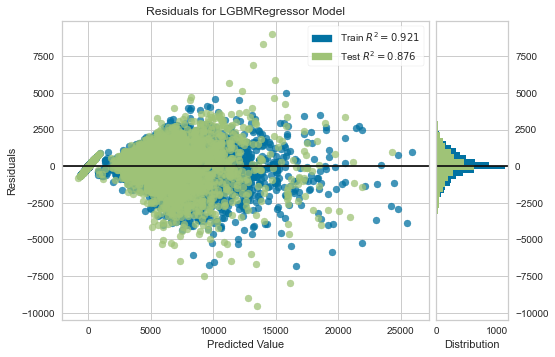

In [12]:
# Plot model
plot_model(tuned_lightgbm)

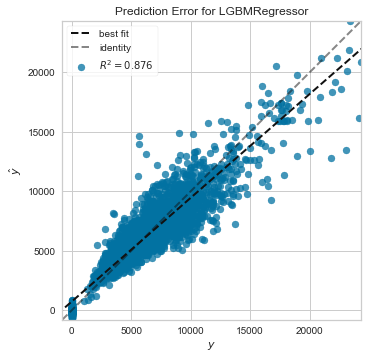

In [13]:
# Plot model error
plot_model(tuned_lightgbm, plot = 'error')

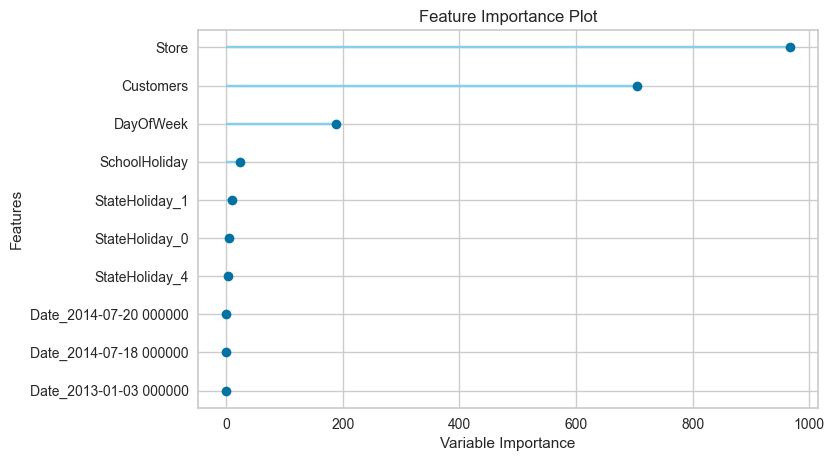

In [14]:
# Plot leading features
plot_model(tuned_lightgbm, plot='feature')

In [15]:
# Evaluate model
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
# Test prediction
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,929.3096,1839261.6373,1356.1938,0.8765,1.8700,0.1663


In [17]:
# Finalized model
final_lightgbm = finalize_model(tuned_lightgbm)

In [18]:
# Check model settings
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.30000000000000004,
              max_depth=100, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=20,
              objective=None, random_state=143, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [19]:
# Test final model
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,765.7187,1155178.3255,1074.7922,0.9224,1.8210,0.1422


In [20]:
# save a model
save_model(final_lightgbm,'Final LightGBM Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Date',
                                                             'StateHoliday'],
                                       display_types=True,
                                       features_todrop=['Promo'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=['Store', 'DayOfWeek',
                                                           'Customers', 'Open',
                                                           'SchoolHoliday'],
                                       target='Sales', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_a...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning

---

In [21]:
# Load model
saved_final_lightgbm = load_model('Final LightGBM Model')

Transformation Pipeline and Model Successfully Loaded


In [22]:
# Test loaded model
predict_model(saved_final_lightgbm, df.tail(1))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Label
263776,12,4,2014-08-14,5581,785,1,0,1,1,6546.878202


# Create App

In [26]:
# Import Libraries
from flask import Flask, request
import numpy as np
import pickle
import pandas as pd
import flasgger
from flasgger import Swagger

In [41]:
# Create app framework
app=Flask(__name__)
Swagger(app)

saved_final_lightgbm = load_model('Final LightGBM Model')

@app.route('/')
def welcome():
    return "Hello World! Please go to /apidocs :)"


@app.route('/predict',methods=["POST"])
def predict_note_file():
    """Rossman Model
    This is using docstrings for specifications.
    ---
    parameters:
      - name: file
        in: formData
        type: file
        required: true
      
    responses:
        200:
            description: The output values
        
    """
    df_test=pd.read_csv(request.files.get("file"))
    
    result = predict_model(saved_final_lightgbm, df_test)['Label']
    
    return str("Sales Prediction = ") + str(result.values.tolist())

if __name__=='__main__':
  app.run()

Transformation Pipeline and Model Successfully Loaded
 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Nov/2021 22:35:25] "GET / HTTP/1.1" 200 -


In [28]:
# Create test file
df.head().to_csv('Train_Head.csv')

In [35]:
# Install library
!pip install pipreqs